## Looking at metrics as a function of model version

#### Set to automatically reload modules

In [1]:
%load_ext autoreload
%autoreload 2

### Import Block

In [2]:
import os                        # import operating system functions
import sys
from socket import gethostname   # used to determine which machine we are
#                                #   running on
import matplotlib.gridspec as gridspec  # pretty subplots
import numpy as np  # for handling arrays
import xarray as xr  # for handling nd things (netcdfs)
import matplotlib.pyplot as plt  # for plotting things
from mdwtools import mdwfunctions as mwfn  # For averaging things
from mdwtools import mdwplots as mwp  # For plotting things

import cesm1to2plotter as c1to2p
# import matplotlib.cm as cm
from scipy.stats import linregress

### Load Section
#### Set flags for loading and some options for plotting

In [5]:
# Set new variables to compute when loading
newVars = 'PRECT'

# Set flags for loading/plotting/doing things
calcPrect_flag = True
lRunMean = 20
ocnOnly_flag = False
save_flag = True
saveSubDir = ''
verbose_flag = False

# Set plotting options
xTickRotation = 45
subFigCountStart = 'a'


#### Load and plot

Processing 01...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 28...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 36...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing ga7.66...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 119...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 125...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 161...
Processing 194...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 195...


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing 297...
1


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


101


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


201


/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/u/home/emaroon/anaconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Processing obs...


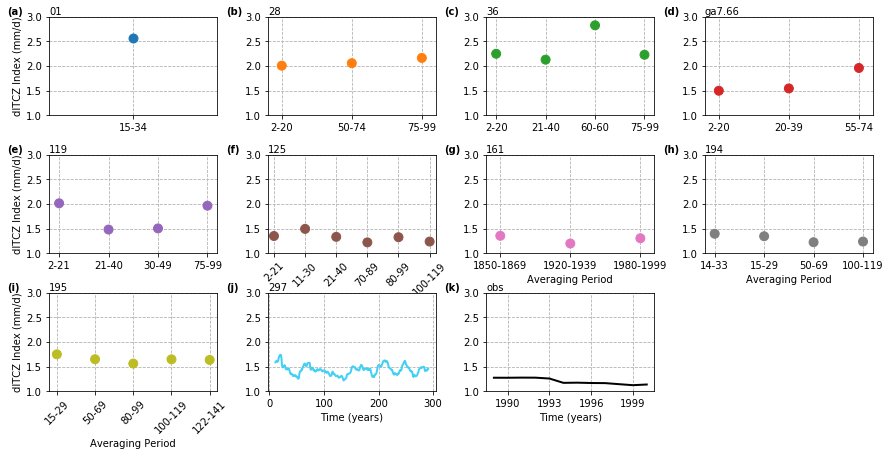

In [8]:
# Get directory of file to load
ncDir, ncSubDir, saveDir = c1to2p.setfilepaths(loadClimo_flag=False)

if gethostname()[0:6] in c1to2p.getncarmachlist(6):
    # Directories on NCAR systems may be all screwy due to changes to file
    #   system on 208-07-11 

    # Set info for "runs of convenience" from Celice at NCAR
    ncDir = '/glade/p_old/cgd/amp/people/hannay/amwg/climo/'

# Set variable for plotting
plotVar = 'PRECT'

nonClimoRuns = ['297']

versionIds = ['01',
               '28',
               '36',
               'ga7.66',
              # '100',
              # '113',
              # '114',
              # '116',
              # '118',
               '119',
               '125',
              '161',
              '194',
              '195',
              '297',
              'obs',
              ]

layout = 'horizontal'

# Set flags and other options based on variable to be plotted
if plotVar == 'TS':
    latLim = np.array([-3, 3])
    lonLim = np.array([180, 220])
    ocnOnly_flag = True
    rmRefRegMean_flag = True
    refLatLim = np.array([-20, 20])
    refLonLim = np.array([150, 250])
    yLim = np.array([-2.0, 1.0])
elif plotVar in ['PRECT', 'PRECC', 'PRECL']:
    latLim = np.array([-20, 0])
    lonLim = np.array([210, 260])
    if 'obs' in versionIds:
        obsYrs = [1979, 2009]
        obsDs = c1to2p.loadobsdatasets(
            gpcp_flag=True,
            gpcpYrs=obsYrs,
            whichGpcp='all',
            )['gpcp']
        obsVar = ('precip' if 'precip' in obsDs else 'PRECT')
    ocnOnly_flag = ocnOnly_flag
    rmRefRegMean_flag = False
    refLatLim = np.array([0, 0])
    refLonLim = np.array([0, 0])
    yLim = np.array([1.00, 3.00])
else:
    latLim = np.array([-20, 20])
    lonLim = np.array([120, 270])
    ocnOnly_flag = False
    rmRefRegMean_flag = False
    refLatLim = np.array([0, 0])
    refLonLim = np.array([0, 0])
    yLim = None

if len(versionIds) == 9:
    hf = plt.figure()
    hf.set_size_inches(10, 6.5, forward=True)
    
    gs = gridspec.GridSpec(3, 3,
                           # height_ratios=[20, 1, 20, 1, 20],
                           hspace=(0.3
                                   if xTickRotation is None
                                   else 0.4),
                           # width_ratios=[30, 30, 1],
                           wspace=0.3,
                           )
    gs.update(left=0.07, right=0.95, top=0.95, bottom=0.05)
    
    rowInds = [0, 0, 0, 1, 1, 1, 2, 2, 2]
    colInds = [0, 1, 2, 0, 1, 2, 0, 1, 2]
    
    subplotLblLoc = (-0.25, 1.00)
elif len(versionIds) <= 12:
    hf = plt.figure()
    if layout in ['vertical', 'vert', 'v']:
        figDx = 10
        figDy = 8.5
        nCols = 3
        nRows = 4
    elif layout in ['horizontal', 'horz', 'h']:
        figDx = 13
        figDy = 6.5
        nCols = 4
        nRows = 3
    hf.set_size_inches(figDx, figDy, forward=True)
    
    gs = gridspec.GridSpec(nRows, nCols,
                           # height_ratios=[20, 1, 20, 1, 20],
                           hspace=(0.3
                                   if xTickRotation is None
                                   else 0.4),
                           # width_ratios=[30, 30, 1],
                           wspace=0.3,
                           )
    gs.update(left=0.07, right=0.95, top=0.95, bottom=0.15)

    colInds = [j for j in range(nCols)]*nRows
    rowInds = np.repeat([j for j in range(nRows)], nCols)

    # colInds = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
    # rowInds = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
    
    subplotLblLoc = (-0.25, 1.00)

skippedPlotCount = 0

axList = [None]*len(rowInds)
    

for jId, versionId in enumerate(versionIds):

    if versionId is None:
        skippedPlotCount = skippedPlotCount + 1
        continue

    axList[jId] = plt.subplot(gs[rowInds[jId], colInds[jId]])
    
    print('Processing {:s}...'.format(versionId))

    if versionId in ['obs']:
        # Compute regional mean of observations
        obsRegMeanDa = mwfn.calcdaregmean(obsDs[obsVar],
                                          gwDa=None,
                                          latLim=latLim,
                                          lonLim=lonLim,
                                          stdUnits_flag=True,
                                          )
        # Compute regional mean of reference region for observations
        if rmRefRegMean_flag:
            obsRefRegMeanDa = mwfn.calcdaregmean(obsDs[obsVar],
                                                 gwDa=None,
                                                 latLim=refLatLim,
                                                 lonLim=refLonLim,
                                                 stdUnits_flag=True,
                                                 )

            obsRegMeanDa = obsRegMeanDa - obsRefRegMeanDa

        # Get annual means of obs
        try:
            obsRegAnnMeans = (
                obsRegMeanDa.data.reshape([
                    int(obsRegMeanDa.size/12), 12]).mean(axis=1)
                )
        except ValueError:
            obsRegAnnMeans = (
                obsRegMeanDa.data[
                    :-np.mod(obsRegMeanDa.data.size, 12)
                    ].reshape([int(obsRegMeanDa.size/12),
                               12]).mean(axis=1)
                )
        # Compute running means of obs annual means for comparison
        obsRunMean = np.array([
            np.mean(obsRegAnnMeans[j:j+lRunMean])
            for j in np.arange(0, obsRegAnnMeans.size-lRunMean+1)])
        
        # Plot running means
        plt.plot(np.arange(obsYrs[0] + lRunMean/2,
                           obsYrs[0] + len(obsRunMean) + lRunMean/2,
                           1),
                 obsRunMean,
                 color='k',
                 lw=2)
        if lRunMean == 20:
            plt.xticks(np.arange(1990, 2000, 3))
        
    elif versionId in nonClimoRuns:
        yrChunks = 100
        startYr = 1
        totalYrs = 300
        for j, yr0 in enumerate(np.arange(startYr,
                                          startYr + totalYrs,
                                          yrChunks)):
            print(yr0)
            if versionId == '297':
                if plotVar == 'PRECT':
                    precDir = '/gpfs/fs1/scratch/woelfle/precfiles/'
                    caseName = c1to2p.getcasebase(versionId)
                    loadFiles = [
                        precDir + caseName + '/' + caseName +
                        '.cam.h0.{:04d}-{:02d}.nc'.format(yr, mon+1)
                        for yr in np.arange(yr0, yr0 + yrChunks, 1)
                        for mon in np.arange(12)
                        ]
                    # Load case for gs and LANDFRAC
                    dsRef = xr.open_dataset(
                        precDir + caseName + '/LANDFRAC_gw.nc')
                else:
                    loadFiles = c1to2p.getloadfilelists(
                        [versionId],
                        climo_flag=False,
                        nyrs=yrChunks,
                        yr0=yr0,
                        )[versionId]
            ds = xr.open_mfdataset(loadFiles,
                                   decode_times=False)
            # Compute PRECT if needed
            if calcPrect_flag:
                ds['PRECT'] = mwfn.calcprectda(ds)

            # Compute regional mean
            regMeanDa = mwfn.calcdaregmean(ds[plotVar],
                                           gwDa=(ds['gw']
                                                 if 'gw' in ds else
                                                 dsRef['gw']),
                                           latLim=latLim,
                                           lonLim=lonLim,
                                           landFracDa=(
                                               ds['LANDFRAC']
                                               if 'LANDFRAC' in ds else
                                               dsRef['LANDFRAC']),
                                           ocnOnly_flag=ocnOnly_flag,
                                           stdUnits_flag=True,
                                           )
            # Compute regional mean of reference region for observations
            if rmRefRegMean_flag:
                refRegMeanDa = mwfn.calcdaregmean(ds[plotVar],
                                                  gwDa=ds['gw'],
                                                  latLim=refLatLim,
                                                  lonLim=refLonLim,
                                                  landFracDa=(
                                                      ds['LANDFRAC']),
                                                  ocnOnly_flag=ocnOnly_flag,
                                                  stdUnits_flag=True,
                                                  )

                regMeanDa = regMeanDa - refRegMeanDa

            # Compute annual means
            try:
                subRegAnnMeans = (
                    regMeanDa.data.reshape([
                        int(regMeanDa.size/12), 12]).mean(axis=1)
                    )
            except ValueError:
                subRegAnnMeans = (
                    regMeanDa.data[
                        :-np.mod(regMeanDa.data.size, 12)
                        ].reshape([int(regMeanDa.size/12),
                                   12]).mean(axis=1)
                    )
            if j == 0:
                regAnnMeans = subRegAnnMeans
            else:
                regAnnMeans = np.append(regAnnMeans, subRegAnnMeans)
        # Compute running means of obs annual means for comparison
        runMean = np.array([
            np.mean(regAnnMeans[j:j+lRunMean])
            for j in np.arange(0, regAnnMeans.size-lRunMean+1)])
        
        # Plot running means
        plt.plot(np.arange(startYr + lRunMean/2,
                           startYr + len(runMean) + lRunMean/2,
                           1),
                 runMean,
                 color=c1to2p.getcolordict()[versionId],
                 lw=2)

    else:
        # Pull parameters for versionId
        caseBase = c1to2p.getcasebase(versionId)
        yrIds = c1to2p.getavailableyearslist(versionId)
        yrDirs = c1to2p.getyearsubdirs(versionId)
        fileName = caseBase + '_ANN_climo.nc'

        # Create list of files to load
        loadFiles = {yid: (ncDir + caseBase + '/' +
                           yrDirs[jId] + '/' + fileName)
                     for jId, yid in enumerate(yrIds)}

        # Open netcdf file(s)
        dataSets = {yid: xr.open_dataset(loadFiles[yid])
                    for yid in yrIds}

        # Compute PRECT if needed
        if calcPrect_flag:
            for yid in yrIds:
                if verbose_flag:
                    print(yid)
                dataSets[yid]['PRECT'] = mwfn.calcprectda(dataSets[yid])

        # Add year id to dataSets for easy access and bookkeeping
        for yid in yrIds:
            if all([yid == '0.9x1.25',
                    versionId == '01']):
                dataSets[yid].attrs['yid'] = '15-34'
            else:
                dataSets[yid].attrs['yid'] = yid

        # Create dictionary to hold annual mean value (and colors)
        annMean = dict()

        for yid in yrIds:
            # Compute regional mean through time
            regMeanDa = mwfn.calcdaregmean(dataSets[yid][plotVar],
                                           gwDa=dataSets[yid]['gw'],
                                           latLim=latLim,
                                           lonLim=lonLim,
                                           ocnOnly_flag=ocnOnly_flag,
                                           qc_flag=False,
                                           landFracDa=(
                                               dataSets[yid]['LANDFRAC']),
                                           stdUnits_flag=True,
                                           )

            # Compute reference regional mean if needed
            if rmRefRegMean_flag:
                refRegMeanDa = mwfn.calcdaregmean(
                    dataSets[yid][plotVar],
                    gwDa=dataSets[yid]['gw'],
                    latLim=refLatLim,
                    lonLim=refLonLim,
                    ocnOnly_flag=ocnOnly_flag,
                    landFracDa=dataSets[yid]['LANDFRAC'],
                    qc_flag=False,
                    stdUnits_flag=True,
                    )
                regMeanDa = regMeanDa - refRegMeanDa

            annMean[yid] = regMeanDa.mean(dim='time')

        # Plot annual mean values
        plotAnnMeans = [annMean[yid] for yid in yrIds]
        plt.scatter(np.arange(1, len(plotAnnMeans) + 1),
                    np.array(plotAnnMeans),
                    marker='o',
                    c=[c1to2p.getcolordict()[versionId] for yid in yrIds],
                    s=80,
                    )

        # Format x axis
        plt.xlim([0.8, len(annMean) + 0.2])
        plt.xticks(np.arange(1, len(annMean) + 1),
                   [dataSets[yid].yid for yid in yrIds])

        # Rorate xticks if requested
        if (xTickRotation is not None) and (len(annMean) > 4):
            for tick in axList[jId].get_xticklabels():
                tick.set_rotation(xTickRotation)
            
                
    # Add xlabel
    if versionId in ['obs', '297']:
        plt.xlabel('Time (years)')
    else:
        plt.xlabel('Averaging Period')
        # Only label bottom-most plotted row
        try:
            plt.sca(axList[jId-max(colInds)-1])
            plt.xlabel('')
            plt.sca(axList[jId])
        except ValueError:
            # Will give error when axes above does not yet exists
            # This is ok as it means we are working with the top row
            pass

    # Format y axis
    plt.ylim(yLim)
    if all([plotVar == 'TS',
            rmRefRegMean_flag,
            all(latLim == np.array([-3, 3])),
            all(lonLim == np.array([180, 220])),
            all(refLatLim == np.array([-20, 20])),
            all(refLonLim == np.array([150, 250])),
            ]):
        plt.ylabel('CTI ({:s})'.format(dataSets[yid][plotVar].units))
    elif all([plotVar == 'PRECT',
              all(latLim == np.array([-20, 0])),
              all(lonLim == np.array([210, 260]))
             ]):
        plt.ylabel('dITCZ Index (mm/d)')
    else:
        plt.ylabel(plotVar + ' (' +
                   mwp.getlatlimstring(latLim) + ', ' +
                   mwp.getlonlimstring(lonLim, lonFormat='EW') + ')'
                   )
    # Clear y label from all but left-most plotted column
    if colInds[jId] > 0:
        plt.ylabel('')

    # Tweek the grid
    plt.grid(ls='--')
    plt.gca().set_axisbelow(True)

    plt.title('')

    # Add case label as annotation
    axList[jId].annotate(versionId,
                         xy=(0, 1),
                         xycoords='axes fraction',
                         horizontalalignment='left',
                         verticalalignment='bottom',
                         )
        
    # Add subfigure label, e.g. (a)
    axList[jId].annotate('(' +
                         chr(jId +
                             ord(subFigCountStart) -
                             skippedPlotCount
                             ) +
                         ')',
                         # xy=(-0.12, 1.09),
                         xy=subplotLblLoc,
                         xycoords='axes fraction',
                         horizontalalignment='left',
                         verticalalignment='bottom',
                         fontweight='bold',
                         )

if save_flag:
    if plotVar in ['PRECT', 'PRECC', 'PRECL']:
        mwp.savefig(saveDir + saveSubDir +
                    'annmean_dITCZindex_multicases'.format(versionId),
                    dpi=300,
                    )
    elif plotVar in ['TS']:
        mwp.savefig(saveDir + saveSubDir +
                    'annmean_CTI_v{:s}'.format(versionId)
                    )

plt.show()

In [ ]:
yrChunks = 50
startYr = 1
totalYrs = 300

precDir = '/gpfs/fs1/scratch/woelfle/precfiles/'
caseName = 'b.e20.B1850.f09_g17.pi_control.all.297'

versionId = '297'

for j, yr0 in enumerate(np.arange(startYr,
                                  startYr + totalYrs,
                                  yrChunks)):
    print(yr0)
    if versionId == '297':
        loadFiles = [
            precDir + caseName + '/' + caseName +
            '.cam.h0.{:04d}-{:02d}.nc'.format(yr, mon+1)
            for yr in np.arange(yr0, yr0 + yrChunks, 1)
            for mon in np.arange(12)
        ]
        
        # loadFiles = c1to2p.getloadfilelists(
            # [versionId],
            # climo_flag=False,
            # nyrs=yrChunks,
            # yr0=yr0,
            # )[versionId]
    print(loadFiles[0:2])
    ds = xr.open_mfdataset(loadFiles,
                           decode_times=False)